In [1]:
import data
import numpy as np

In [2]:
# datasets
datasets_list = [
    {'dataset': 'HERACOMBNCEM', 'frac': 0.75}, 
    {'dataset': 'HERACOMBNCEP460', 'frac': 0.75}, 
    {'dataset': 'HERACOMBNCEP575', 'frac': 0.75}, 
    {'dataset': 'HERACOMBNCEP820', 'frac': 0.75}, 
    {'dataset': 'HERACOMBNCEP920', 'frac': 0.75}, 
    {'dataset': 'HERACOMBCCEM', 'frac': 0.75}, 
    {'dataset': 'HERACOMBCCEP', 'frac': 0.75},
    {'dataset': 'CHORUSNUPb_dw_ite', 'frac': 0.75}, 
    {'dataset': 'CHORUSNBPb_dw_ite', 'frac': 0.75}, 
    {'dataset': 'NTVNUDMNFe_dw_ite', 'frac': 0.75}, 
    {'dataset': 'NTVNBDMNFe_dw_ite', 'frac': 0.75}]

ndatasets = len(datasets_list)

# load data and covmat for all the dataset
data.config['dataset_inputs'] = datasets_list

y = data.values()
cov = data.covmat()

In [3]:
y.shape

(2053,)

In [4]:
cov.shape

(2053, 2053)

In [5]:
# load FK tables
fk_tot = data.theory()
fk_bare = np.concatenate([fk_tot[i]['elements'][0] for i in range(0,ndatasets)],axis=0)
fk_bare.shape


-- Reading COMMONDATA for Dataset: HERACOMBNCEM
nData: 159 nSys: 170
-- COMMONDATA Files for HERACOMBNCEM successfully read.


-- Reading COMMONDATA for Dataset: HERACOMBNCEP460
nData: 209 nSys: 170
-- COMMONDATA Files for HERACOMBNCEP460 successfully read.


-- Reading COMMONDATA for Dataset: HERACOMBNCEP575
nData: 260 nSys: 170
-- COMMONDATA Files for HERACOMBNCEP575 successfully read.


-- Reading COMMONDATA for Dataset: HERACOMBNCEP820
nData: 112 nSys: 170
-- COMMONDATA Files for HERACOMBNCEP820 successfully read.


-- Reading COMMONDATA for Dataset: HERACOMBNCEP920
nData: 485 nSys: 170
-- COMMONDATA Files for HERACOMBNCEP920 successfully read.


-- Reading COMMONDATA for Dataset: HERACOMBCCEM
nData: 42 nSys: 170
-- COMMONDATA Files for HERACOMBCCEM successfully read.


-- Reading COMMONDATA for Dataset: HERACOMBCCEP
nData: 39 nSys: 170
-- COMMONDATA Files for HERACOMBCCEP successfully read.


-- Reading COMMONDATA for Dataset: CHORUSNUPb_dw_ite
nData: 607 nSys: 1014
-- COMMONDATA

(2053, 9, 50)

In [6]:
# reshape FK table as a matrix
ndata, nbasis, nx = fk_bare.shape
fk = fk_bare.reshape(ndata,nbasis*nx)
fk.shape

(2053, 450)

In [7]:
# diagonalize experimental covmat and check its eigenvalues
l, u = np.linalg.eig(cov)
l

array([6.37472410e-01, 1.38542626e-01, 7.73856160e-02, ...,
       3.49172105e-04, 3.70836093e-04, 3.52542873e-04])

In [8]:
#inv_cov = u @ np.diag(1./l) @ u.T 
#inv_cov@cov

In [9]:
# compute inverse of the posterior covmat according to Eq.46
v = u.T@fk
posterior_cov_inverse = v.T @ np.diag(1./l) @ v

In [10]:
posterior_cov_inverse.shape

(450, 450)

In [11]:
# add a gaussian prior proportional to regularize
_, N = posterior_cov_inverse.shape
posterior_cov_inverse_prior = posterior_cov_inverse + 0.001*np.identity(N)

In [12]:
# check eigenvalues without prior
ll, uu = np.linalg.eig(posterior_cov_inverse)
np.real(ll)

array([ 1.58641953e+05,  1.34478321e+05,  1.03901121e+05,  7.22786826e+04,
        6.88418277e+04,  5.15355812e+04,  4.81516049e+04,  3.98592421e+04,
        3.83438508e+04,  3.45999788e+04,  3.32642073e+04,  2.86456442e+04,
        2.61994592e+04,  2.49128214e+04,  2.28017741e+04,  2.15461332e+04,
        2.01641605e+04,  1.93153971e+04,  1.77281270e+04,  1.70283322e+04,
        1.62008296e+04,  1.57497688e+04,  1.47864853e+04,  1.45574983e+04,
        1.39584897e+04,  1.34120331e+04,  1.30895619e+04,  1.19433230e+04,
        1.16405043e+04,  1.14900515e+04,  1.05878141e+04,  9.88003099e+03,
        9.81465900e+03,  9.65545580e+03,  9.26002058e+03,  9.17989265e+03,
        8.92116584e+03,  8.23853391e+03,  8.04491013e+03,  7.86477757e+03,
        7.51155025e+03,  7.42972291e+03,  7.35540127e+03,  6.98648103e+03,
        6.78172721e+03,  6.40845173e+03,  6.14927785e+03,  5.99264425e+03,
        5.78916063e+03,  5.73804823e+03,  5.61785542e+03,  5.42562104e+03,
        5.10826483e+03,  

In [13]:
# check eigenvalues with prior
llp, uup = np.linalg.eig(posterior_cov_inverse_prior)
llp = np.real(llp)
uup = np.real(uup)
llp

array([1.58641954e+05, 1.34478322e+05, 1.03901122e+05, 7.22786836e+04,
       6.88418287e+04, 5.15355822e+04, 4.81516059e+04, 3.98592431e+04,
       3.83438518e+04, 3.45999798e+04, 3.32642083e+04, 2.86456452e+04,
       2.61994602e+04, 2.49128224e+04, 2.28017751e+04, 2.15461342e+04,
       2.01641615e+04, 1.93153981e+04, 1.77281280e+04, 1.70283332e+04,
       1.62008306e+04, 1.57497698e+04, 1.47864863e+04, 1.45574993e+04,
       1.39584907e+04, 1.34120341e+04, 1.30895629e+04, 1.19433240e+04,
       1.16405053e+04, 1.14900525e+04, 1.05878151e+04, 9.88003199e+03,
       9.81466000e+03, 9.65545680e+03, 9.26002158e+03, 9.17989365e+03,
       8.92116684e+03, 8.23853491e+03, 8.04491113e+03, 7.86477857e+03,
       7.51155125e+03, 7.42972391e+03, 7.35540227e+03, 6.98648203e+03,
       6.78172821e+03, 6.40845273e+03, 6.14927885e+03, 5.99264525e+03,
       5.78916163e+03, 5.73804923e+03, 5.61785642e+03, 5.42562204e+03,
       5.10826583e+03, 5.03637728e+03, 4.98517894e+03, 4.84488476e+03,
      

In [14]:
# posterior covmat
cov_posterior = uup @ np.diag(1./llp) @ uup.T

In [15]:
posterior_cov_inverse_prior @ cov_posterior

array([[ 9.98615644e-01,  2.62050849e-02, -1.64089767e-04, ...,
        -1.54461928e-07,  6.44740918e-07, -6.24362289e-07],
       [ 2.62050862e-02,  9.54470685e-01,  5.78899103e-05, ...,
        -7.78029067e-07,  7.07102107e-07, -5.68307108e-08],
       [-1.64090002e-04,  5.78901863e-05,  1.00000520e+00, ...,
        -1.98187328e-07, -3.22923842e-07,  3.28091879e-07],
       ...,
       [-1.54481160e-07, -7.78041155e-07, -1.98208898e-07, ...,
         1.00000152e+00,  1.77363978e-06, -2.41942973e-06],
       [ 6.44733186e-07,  7.07094152e-07, -3.22916197e-07, ...,
         1.77360880e-06,  9.99998303e-01, -4.57702640e-08],
       [-6.24381082e-07, -5.68389709e-08,  3.28100906e-07, ...,
        -2.41943576e-06, -4.57554279e-08,  1.00000143e+00]])

In [16]:
# compute central value posterior, Eq. 47
v1 = u.T@y
w = uup.T@fk.T@ u
cv_posterior = uup @ np.diag(1./llp) @ w @ np.diag(1./l) @ v1

In [17]:
cv_posterior.shape

(450,)

In [18]:
# draw samples
samples=np.random.multivariate_normal(cv_posterior, cov_posterior, size=1000)

In [19]:
samples.shape

(1000, 450)

In [20]:
f = np.array([samples[:,i*50:(i+1)*50] for i in range(0,9)])
flavour_cv = f.mean(axis=1)
flavour_std = f.std(axis=1)
    
flavour_labels=['Sigma','g','V','V3','V8','V15','T3','T8','T15']

In [21]:
x = np.array([
2.9699999989970886e-05,
4.1246302562114121e-05,
5.7279854290892427e-05,
7.9543107354176351e-05,
1.1045380151089824e-04,
1.5336544212678162e-04,
2.1292711419771039e-04,
2.9557946342023174e-04,
4.1023635832702205e-04,
5.6921788919482173e-04,
7.8952001737071158e-04,
1.0945283774603655e-03,
1.5163052361650959e-03,
2.0985919006607802e-03,
2.9006588501226953e-03,
4.0020755222241709e-03,
5.5083182403814438e-03,
7.5568314649709480e-03,
1.0322652614357851e-02,
1.4022011128953883e-02,
1.8911583033933310e-02,
2.5280751342878608e-02,
3.3434951223099259e-02,
4.3670479005884652e-02,
5.6244653828324422e-02,
7.1348265292604018e-02,
8.9087633304453406e-02,
1.0948053859041228e-01,
1.3246538983220960e-01,
1.5791909766096124e-01,
1.8567792651252230e-01,
2.1555676356233966e-01,
2.4736436150447358e-01,
2.8091396862547191e-01,
3.1602987267868177e-01,
3.5255081809432581e-01,
3.9033126797342838e-01,
4.2924130793198417e-01,
4.6916577293070166e-01,
5.1000298771219632e-01,
5.5166336656838788e-01,
5.9406801715516011e-01,
6.3714742681882575e-01,
6.8084026849030499e-01,
7.2509233853930255e-01,
7.6985562506376237e-01,
8.1508749786096646e-01,
8.6075000810050684e-01,
9.0680928480266942e-01,
9.5323501557082535e-01,
])

In [22]:
x.shape

(50,)

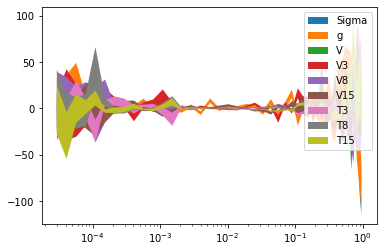

In [23]:
import matplotlib.pyplot as plt
for i in range(0,9):
    plt.fill_between(x, flavour_cv[i]-flavour_std[i], flavour_cv[i]+flavour_std[i], label=flavour_labels[i])
plt.xscale('log')
plt.legend()